### 数据分析

In [1]:
import os
import cv2
import random
import numpy as np
import pandas as pd
from glob import iglob
import matplotlib.pyplot as plt
from keras.preprocessing import image

%matplotlib inline
random.seed(9527)

Using TensorFlow backend.


In [2]:
def load_dataset(path):
    image_list = []
    images = iglob(path)
    for image in images:
        image_name = os.path.basename(image)
        data = image_name.split('.')
        data[0] = 1 if data[0] == 'dog' else 0
        data.append(image)
        image_list.append(data)
    image_list.sort(key=lambda x: int(x[1]))
    return image_list

In [3]:
train_data = load_dataset('./all/train/*')
# 随机打乱数据集
random.shuffle(train_data)
train_data[:5]

[[1, '446', 'jpg', './all/train\\dog.446.jpg'],
 [0, '4840', 'jpg', './all/train\\cat.4840.jpg'],
 [0, '8467', 'jpg', './all/train\\cat.8467.jpg'],
 [1, '4930', 'jpg', './all/train\\dog.4930.jpg'],
 [1, '7202', 'jpg', './all/train\\dog.7202.jpg']]

In [4]:
# train文件夹图片数量和类型
train_data = np.array(train_data)
train_target = train_data[:, 0]
all_num = len(train_data)
cat_num = (train_target == '0').sum()
dog_num = (train_target == '1').sum()
print("图片共有{}张图片, {}张猫，{}张狗".format(all_num, cat_num, dog_num))

图片共有25000张图片, 12500张猫，12500张狗


In [5]:
# train文件夹中图片的格式
image_format = train_data[:, 2]
print("25000张图片都是jpg格式: {}".format(all(image_format == 'jpg')))

25000张图片都是jpg格式: True


In [6]:
def get_image_shape(files):
    shape_list = []
    for file in files:
        im = image.load_img(file)
        tens = image.img_to_array(im)
        shape_list.append(tens.shape)
    return shape_list

shape_list = get_image_shape(train_data[:, 3])
ordered_shape_list = sorted(shape_list, key=lambda x: x[0]+x[1])

print("最小的图片:{}, 最大的图片:{}".format(ordered_shape_list[0], ordered_shape_list[-1]))

最小的图片:(38, 50, 3), 最大的图片:(768, 1023, 3)


Text(0.5, 1.0, '图片分辨率分布')

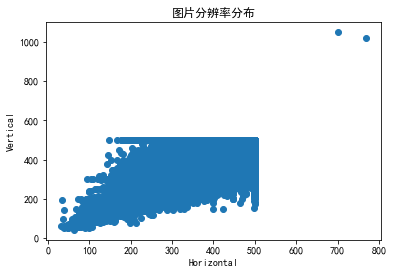

In [7]:
# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

x = [x[0] for x in ordered_shape_list]
y = [x[1] for x in ordered_shape_list]
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.xlabel('Horizontal')
plt.ylabel('Vertical')
plt.title('图片分辨率分布')

### 可视化12张图片

In [5]:
train_files, train_targets = train_data[:][:, 3], train_data[:][:, 0]
train_targets = train_targets.astype(int)
train_files[:5], train_targets[:5]

(array(['./all/train\\dog.446.jpg', './all/train\\cat.4840.jpg',
        './all/train\\cat.8467.jpg', './all/train\\dog.4930.jpg',
        './all/train\\dog.7202.jpg'], dtype='<U25'), array([1, 0, 0, 1, 1]))

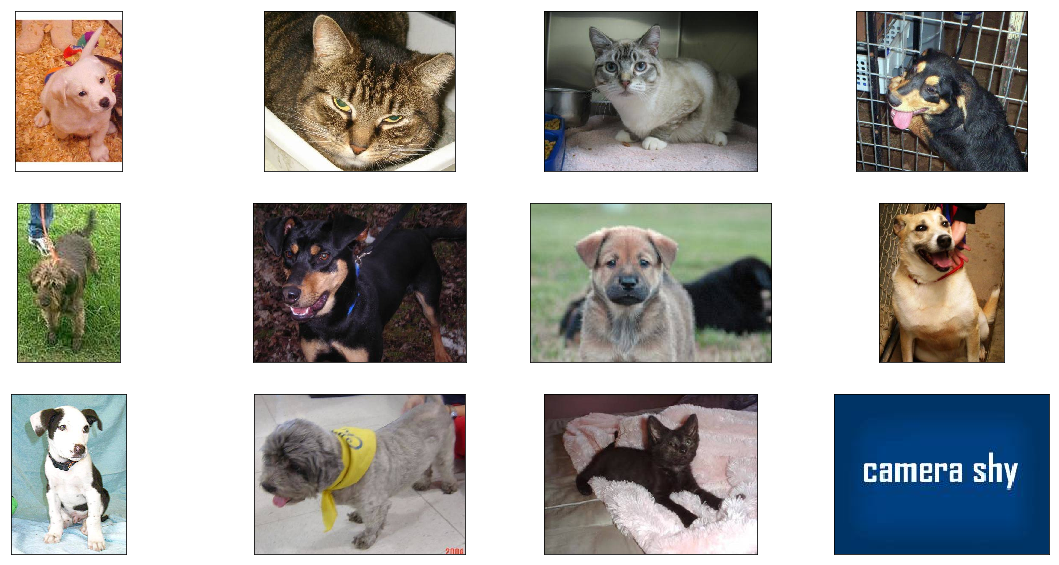

In [6]:
def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20, 10))
for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1, xticks=[], yticks=[])
    visualize_img(train_files[i], ax)

可以看到存在既不是猫也不是狗的图片

In [7]:
error_files = []
cat = [3216, 4338, 4688, 5351, 5418, 7377, 7564 ,8456, 9171, 10029, 10712, 11184]
dog = [1043, 1259, 1194, 1773, 2614, 4367,5604, 6475, 8736, 8898, 9517, 10161, 10237, 10747, 10801, 11299, 12376]
cat_files = ['./all/train\\cat.{}.jpg'.format(i) for i in cat]
dog_files = ['./all/train\\dog.{}.jpg'.format(i) for i in dog]
error_files.extend(cat_files)
error_files.extend(dog_files)

经过人工查找大约有30个不包含猫或狗的异常图片

In [8]:
dogs_cats = [
 'n02085620','n02085782','n02085936','n02086079'
,'n02086240','n02086646','n02086910','n02087046'
,'n02087394','n02088094','n02088238','n02088364'
,'n02088466','n02088632','n02089078','n02089867'
,'n02089973','n02090379','n02090622','n02090721'
,'n02091032','n02091134','n02091244','n02091467'
,'n02091635','n02091831','n02092002','n02092339'
,'n02093256','n02093428','n02093647','n02093754'
,'n02093859','n02093991','n02094114','n02094258'
,'n02094433','n02095314','n02095570','n02095889'
,'n02096051','n02096177','n02096294','n02096437'
,'n02096585','n02097047','n02097130','n02097209'
,'n02097298','n02097474','n02097658','n02098105'
,'n02098286','n02098413','n02099267','n02099429'
,'n02099601','n02099712','n02099849','n02100236'
,'n02100583','n02100735','n02100877','n02101006'
,'n02101388','n02101556','n02102040','n02102177'
,'n02102318','n02102480','n02102973','n02104029'
,'n02104365','n02105056','n02105162','n02105251'
,'n02105412','n02105505','n02105641','n02105855'
,'n02106030','n02106166','n02106382','n02106550'
,'n02106662','n02107142','n02107312','n02107574'
,'n02107683','n02107908','n02108000','n02108089'
,'n02108422','n02108551','n02108915','n02109047'
,'n02109525','n02109961','n02110063','n02110185'
,'n02110341','n02110627','n02110806','n02110958'
,'n02111129','n02111277','n02111500','n02111889'
,'n02112018','n02112137','n02112350','n02112706'
,'n02113023','n02113186','n02113624','n02113712'
,'n02113799','n02113978','n02123045','n02123159'
,'n02123394','n02123597','n02124075','n02125311'
,'n02127052']
dogs_cats = set(dogs_cats)

In [13]:
def path_to_tensor(img_path):
    # 用PIL加载RGB图像为PIL.Image.Image类型
    img = image.load_img(img_path, target_size=(299, 299))
    # 将PIL.Image.Image类型转化为格式为(299, 299, 3)的3维张量
    x = image.img_to_array(img)
    # 将3维张量转化为格式为(1, 299, 299, 3)的4维张量并返回
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [15]:
from keras.applications.xception import Xception, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from tqdm import tqdm

model = Xception(weights='imagenet')

train_tensors = preprocess_input(paths_to_tensor(train_files))

preds = model.predict(train_tensors)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
# print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:55<00:00, 452.61it/s]


In [16]:
predictions = decode_predictions(preds, top=20)

In [17]:
error_files = []
for i, breed in enumerate(predictions):
    aa = np.array(breed)[:,0]
    if not(set(aa.tolist()) & dogs_cats):
        error_files.append(train_files[i])

In [18]:
len(error_files)

67

通过预训练的模型总共检测出67个异常数据


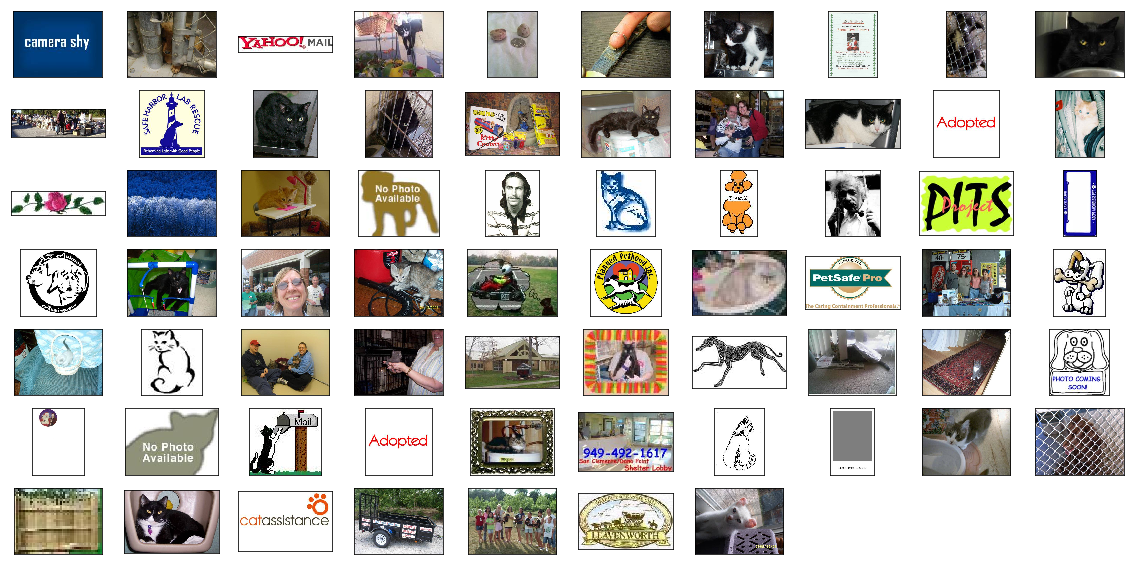

In [19]:
def visualize_img(img_path, ax):
    img = cv2.imread(img_path)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
fig = plt.figure(figsize=(20, 10))
for i in range(67):
    ax = fig.add_subplot(7, 10, i + 1, xticks=[], yticks=[])
    visualize_img(error_files[i], ax)
print("通过预训练的模型总共检测出{}个异常数据".format(len(error_files)))

In [20]:
error_files

['./all/train\\dog.5604.jpg',
 './all/train\\dog.2422.jpg',
 './all/train\\dog.4367.jpg',
 './all/train\\cat.9494.jpg',
 './all/train\\dog.2614.jpg',
 './all/train\\dog.10801.jpg',
 './all/train\\cat.2429.jpg',
 './all/train\\cat.12272.jpg',
 './all/train\\dog.12155.jpg',
 './all/train\\cat.7682.jpg',
 './all/train\\cat.5351.jpg',
 './all/train\\dog.10161.jpg',
 './all/train\\cat.11237.jpg',
 './all/train\\cat.3123.jpg',
 './all/train\\cat.4308.jpg',
 './all/train\\cat.8286.jpg',
 './all/train\\cat.2520.jpg',
 './all/train\\cat.5804.jpg',
 './all/train\\cat.8456.jpg',
 './all/train\\cat.5071.jpg',
 './all/train\\cat.9171.jpg',
 './all/train\\cat.5418.jpg',
 './all/train\\cat.10176.jpg',
 './all/train\\dog.8898.jpg',
 './all/train\\cat.7377.jpg',
 './all/train\\cat.4833.jpg',
 './all/train\\dog.1259.jpg',
 './all/train\\dog.1773.jpg',
 './all/train\\dog.10237.jpg',
 './all/train\\dog.9517.jpg',
 './all/train\\dog.10190.jpg',
 './all/train\\cat.5609.jpg',
 './all/train\\dog.12376.jpg',
 

In [22]:
for file in error_files:
    if os.path.exists(file):
        os.remove(file)

In [23]:
os.path.exists('./all/train\\cat.519.jpg')

False